In [1]:
import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

In [2]:
results = earthaccess.search_datasets(instrument="oci")

In [4]:
def WestAfrica(lon,lat):

    print(len(lon))
    print(len(lat))
    #Approx lat, lon: top right: 29.5381, -10.4448, bottom left: 13.3830, -33.4435 
    y1 = 13.3830 #south
    y2 = 29.5381 #north
    x1 = -33.4435 #west
    x2 = -10.4448 #east

    lat1_ds = min(range(len(lat)), key=lambda i: abs(lat[i]- y1)) #get bounding box
    lat2_ds = min(range(len(lat)), key=lambda i: abs(lat[i]- y2))
    lon1_ds = min(range(len(lon)), key=lambda i: abs(lon[i]- x1))
    lon2_ds = min(range(len(lon)), key=lambda i: abs(lon[i]- x2))
    print(lat1_ds,lat2_ds,lon1_ds,lon2_ds)

    #lets return the actual lat/lons
    lat1 = lat[lat1_ds]
    lat2 = lat[lat2_ds]
    lon1 = lon[lon1_ds]
    lon2 = lon[lon2_ds]


    # return [lon1,lon2,lat1,lat2]
    return[lat1_ds,lat2_ds,lon1_ds,lon2_ds]

In [5]:
target_date_range = np.arange(datetime(2024,9,24), datetime(2024,10,10), timedelta(days=1)).astype(datetime)
redGuys = []
greenGuys = []
blueGuys = []
granule_to_grab = [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1]
i = 0
for day in target_date_range:
    #pull the little guy data
    tspan = (str(day), str(day))
    point = (-27,21)
    results = earthaccess.search_data(short_name="PACE_OCI_L3M_MOANA",temporal=tspan,point=point)
    print(len(results))
    paths = earthaccess.open(results)
    
    dataset = xr.open_dataset(paths[granule_to_grab[i]]) 
    datatree = xr.open_datatree(paths[granule_to_grab[i]])
    i+=1
    dataset = xr.merge(datatree.to_dict().values())
    
    #get the correct granule
    WA_Bounds = WestAfrica(dataset['lon'].values, dataset['lat'].values) 
    
    #average it
    # print([WA_Bounds[1],WA_Bounds[0],WA_Bounds[2],WA_Bounds[3]])
    # print(dataset["picoeuk_moana"][WA_Bounds[1]:WA_Bounds[0],WA_Bounds[2]:WA_Bounds[3]])
    # print(np.nanmean(dataset["picoeuk_moana"][WA_Bounds[1]:WA_Bounds[0],WA_Bounds[2]:WA_Bounds[3]].values))
    
    tempRed = np.nanmean(dataset["picoeuk_moana"][WA_Bounds[1]:WA_Bounds[0],WA_Bounds[2]:WA_Bounds[3]].values)
    tempGreen = np.nanmean(dataset["prococcus_moana"][WA_Bounds[1]:WA_Bounds[0],WA_Bounds[2]:WA_Bounds[3]].values)
    tempBlue = np.nanmean(dataset["syncoccus_moana"][WA_Bounds[1]:WA_Bounds[0],WA_Bounds[2]:WA_Bounds[3]].values)

    #save it
    redGuys.append(tempRed)
    greenGuys.append(tempGreen)
    blueGuys.append(tempBlue)

    

2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745
2


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

1100
1400
566 404 515 745


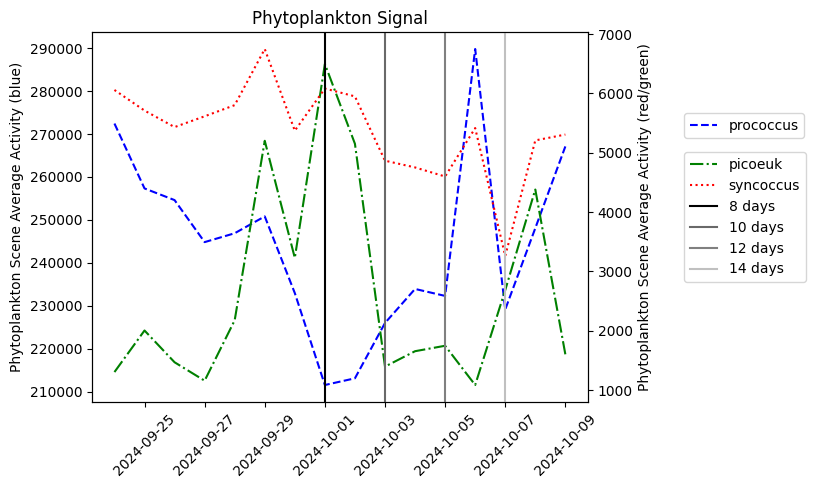

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xticks(rotation = 45)

ax.plot(target_date_range, greenGuys, label = 'prococcus', linestyle = '--', color = 'blue')
ax2 = ax.twinx()
ax2.plot(target_date_range, redGuys, label = 'picoeuk', linestyle = '-.', color = 'green')
ax2.plot(target_date_range, blueGuys, label = 'syncoccus', linestyle = ':' ,color = 'red')
plt.xlabel('Date')
ax.set_ylabel('Phytoplankton Scene Average Activity (blue)')
ax2.set_ylabel('Phytoplankton Scene Average Activity (red/green)')

plt.title('Phytoplankton Signal')

plt.axvline(target_date_range[7], color = 'black', label = '8 days')
plt.axvline(target_date_range[9], color = 'dimgray', label = '10 days')
plt.axvline(target_date_range[11], color = 'gray', label = '12 days')
plt.axvline(target_date_range[13], color = 'silver', label = '14 days')

ax.legend(loc='upper left', bbox_to_anchor=(1.18, 0.8))
ax2.legend(loc='center left', bbox_to_anchor=(1.18, 0.5))

In [33]:
# for item in results:
#     summary = item.summary()
#     print(summary["short-name"])

In [4]:
tspan = ("2024-10-10", "2024-10-10")
point = (-27,21)
clouds = (0, 50)

In [5]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_MOANA",
    temporal=tspan,
    point=point
)
len(results)

2

In [7]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
i = 1
dataset = xr.open_dataset(paths[i])
dataset

<xarray.Dataset> Size: 18MB
Dimensions:          (lat: 1400, lon: 1100, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 6kB 69.95 69.85 69.75 ... -69.85 -69.95
  * lon              (lon) float32 4kB -84.95 -84.85 -84.75 ... 24.85 24.95
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (lat, lon) float32 6MB ...
    syncoccus_moana  (lat, lon) float32 6MB ...
    picoeuk_moana    (lat, lon) float32 6MB ...
    palette          (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/MOANA/3.0
    data_bins:                         124780
    data_minimum:                      -inf
    data_maximum:                      inf

In [15]:
datatree = xr.open_datatree(paths[i])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:          (lat: 1400, lon: 1100, rgb: 3, eightbitcolor: 256)
│   Coordinates:
│     * lat              (lat) float32 6kB 69.95 69.85 69.75 ... -69.85 -69.95
│     * lon              (lon) float32 4kB -84.95 -84.85 -84.75 ... 24.85 24.95
│   Dimensions without coordinates: rgb, eightbitcolor
│   Data variables:
│       prococcus_moana  (lat, lon) float32 6MB ...
│       syncoccus_moana  (lat, lon) float32 6MB ...
│       picoeuk_moana    (lat, lon) float32 6MB ...
│       palette          (rgb, eightbitcolor) uint8 768B ...
│   Attributes: (12/62)
│       product_name:                      PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0...
│       instrument:                        OCI
│       title:                             OCI Level-3 Standard Mapped Image
│       project:                           Ocean Biology Processing Group (NASA/G...
│       platform:                          PACE
│       source:                            satellite observations from OCI-PACE
│       ...                                ...
│       cdm_data_type:                     grid
│       identifier_product_doi_authority:  http://dx.doi.org
│       identifier_product_doi:            10.5067/PACE/OCI/L3M/MOANA/3.0
│       data_bins:                         124780
│       data_minimum:                      -inf
│       data_maximum:                      inf
└── Group: /processing_control
    │   Attributes:
    │       software_name:     l3mapgen
    │       software_version:  2.4.0-V2025.1
    │       input_sources:     PACE_OCI.20241010.L3b.DAY.MOANA.V3_0.nc
    │       l2_flag_names:     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH...
    └── Group: /processing_control/input_parameters
            Attributes: (12/48)
                par:                PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0p1deg.nc.param
                suite:              MOANA
                ifile:              PACE_OCI.20241010.L3b.DAY.MOANA.V3_0.nc
                ofile:              PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0p1deg.nc
                oformat:            2
                ofile_product_tag:  PRODUCT
                ...                 ...
                num_cache:          500
                mask_land:          1
                rgb_land:           160,82,45
                land:               $OCDATAROOT/common/landmask_GMT15ARC.nc
                full_latlon:        yes
                doi:                10.5067/PACE/OCI/L3M/MOANA/3.0

In [16]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 18MB
Dimensions:          (lat: 1400, lon: 1100, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 6kB 69.95 69.85 69.75 ... -69.85 -69.95
  * lon              (lon) float32 4kB -84.95 -84.85 -84.75 ... 24.85 24.95
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (lat, lon) float32 6MB ...
    syncoccus_moana  (lat, lon) float32 6MB ...
    picoeuk_moana    (lat, lon) float32 6MB ...
    palette          (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/MOANA/3.0
    data_bins:                         124780
    data_minimum:                      -inf
    data_maximum:                      inf

In [17]:
# dataset = dataset.set_coords(("Longitude", "Latitude"))
dataset

<xarray.Dataset> Size: 18MB
Dimensions:          (lat: 1400, lon: 1100, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 6kB 69.95 69.85 69.75 ... -69.85 -69.95
  * lon              (lon) float32 4kB -84.95 -84.85 -84.75 ... 24.85 24.95
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (lat, lon) float32 6MB ...
    syncoccus_moana  (lat, lon) float32 6MB ...
    picoeuk_moana    (lat, lon) float32 6MB ...
    palette          (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20241010.L3m.DAY.MOANA.V3_0.0...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/MOANA/3.0
    data_bins:                         124780
    data_minimum:                      -inf
    data_maximum:                      inf

Text(0.5, 1.0, '2024-10-10')

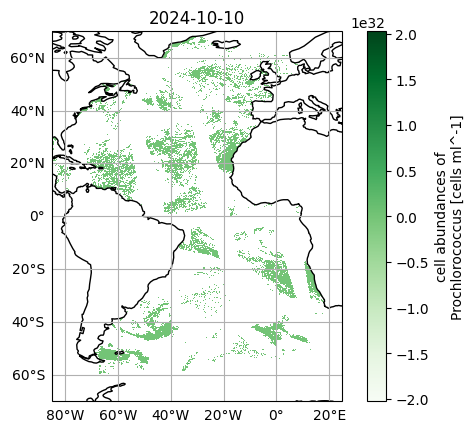

In [265]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["prococcus_moana"].plot(
    x="lon", y="lat", cmap="Greens", ax=ax)
plt.title(tspan[0])

Text(0.5, 1.0, '2024-10-10')

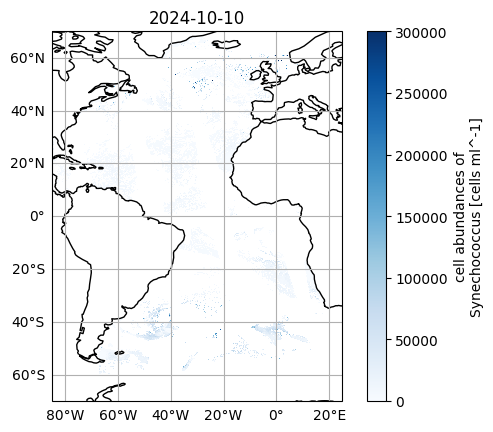

In [266]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["syncoccus_moana"].plot(
    x="lon", y="lat", cmap="Blues", ax=ax
)
plt.title(tspan[0])

Text(0.5, 1.0, '2024-10-10')

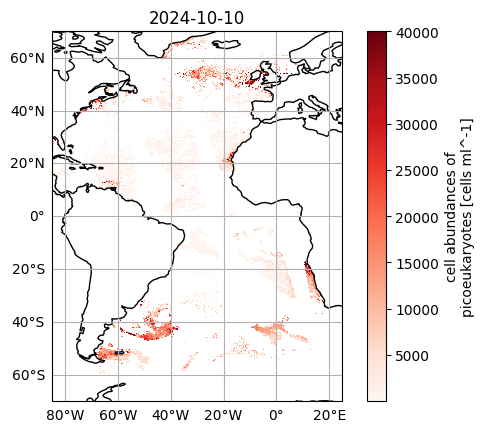

In [267]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["picoeuk_moana"].plot(
    x="lon", y="lat", cmap="Reds", ax=ax)
plt.title(tspan[0])

In [268]:
def WestAfrica(lon,lat):

    print(len(lon))
    print(len(lat))
    #Approx lat, lon: top right: 29.5381, -10.4448, bottom left: 13.3830, -33.4435 
    y1 = 13.3830 #south
    y2 = 29.5381 #north
    x1 = -33.4435 #west
    x2 = -10.4448 #east

    lat1_ds = min(range(len(lat)), key=lambda i: abs(lat[i]- y1)) #get bounding box
    lat2_ds = min(range(len(lat)), key=lambda i: abs(lat[i]- y2))
    lon1_ds = min(range(len(lon)), key=lambda i: abs(lon[i]- x1))
    lon2_ds = min(range(len(lon)), key=lambda i: abs(lon[i]- x2))
    print(lat1_ds,lat2_ds,lon1_ds,lon2_ds)

    #lets return the actual lat/lons
    lat1 = lat[lat1_ds]
    lat2 = lat[lat2_ds]
    lon1 = lon[lon1_ds]
    lon2 = lon[lon2_ds]


    # return [lon1,lon2,lat1,lat2]
    return[lat1_ds,lat2_ds,lon1_ds,lon2_ds]

In [269]:
WA_Bounds = WestAfrica(dataset['lon'].values, dataset['lat'].values)
WA_Bounds
# print(dataset['lat'].values)

1100
1400
566 404 515 745


[566, 404, 515, 745]

Text(0.5, 1.0, '2024-10-10')

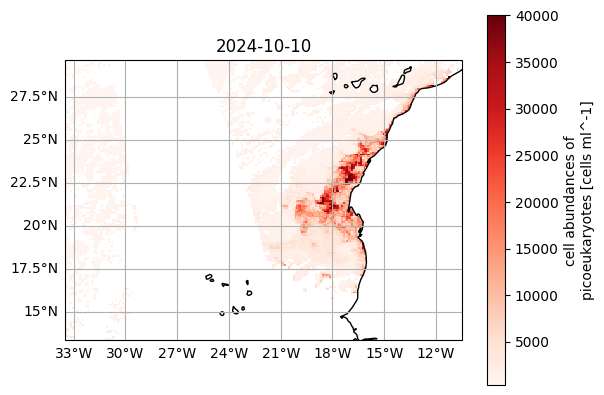

In [270]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["picoeuk_moana"][404:566,515:745].plot(
    x="lon", y="lat", cmap="Reds", ax=ax
)
plt.title(tspan[0])

Text(0.5, 1.0, '2024-10-10')

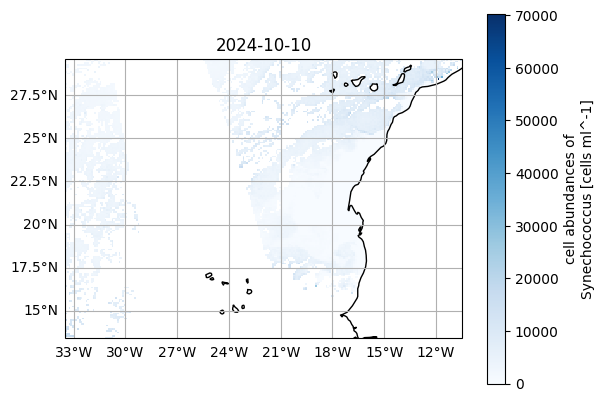

In [271]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["syncoccus_moana"][404:566,515:745].plot(
    x="lon", y="lat", cmap="Blues", ax=ax
)
plt.title(tspan[0])

Text(0.5, 1.0, '2024-10-03')

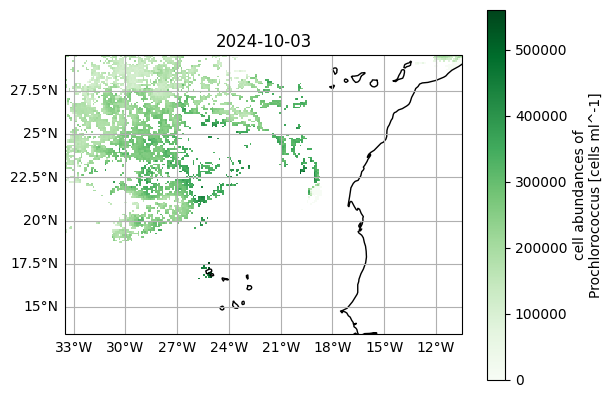

In [262]:

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["prococcus_moana"][404:566,515:745].plot(
    x="lon", y="lat", cmap="Greens", ax=ax
)
plt.title(tspan[0])

In [16]:
pip install global-land-mask


  Using cached global_land_mask-1.0.0-py3-none-any.whl.metadata (5.2 kB)
Using cached global_land_mask-1.0.0-py3-none-any.whl (1.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
from datetime import datetime
import pdb
from datetime import datetime, timedelta
from glob import glob
from global_land_mask import globe
def maskMaker():
    oci_dir = '/home/jovyan/shared-public/DustBlumes/PACE_OCI_AOD/'

    #date range 
    target_date_range = np.arange(datetime(2024,9,24), datetime(2024,10,10), timedelta(days=1)).astype(datetime)

    #save these for later
    daily_AOD_avg = []
    daily_AOD_anom_avg = []
    daily_plume_mask = []
    
    for day in target_date_range:
        files = sorted(glob(oci_dir + day.strftime('*%Y%m%dT*'))) 
        aods = []
        ssas = []
        lons = []
        lats = []
    
        for file in files:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())

            #single granule
            lon = np.array(dataset['longitude'])
            lat = np.array(dataset['latitude'])
            aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))

            #whole picture
            lons.append(lon)
            lats.append(lat)
            aods.append(aod)

            #extract pixels that are over water and above 0.3 AOD
            over_water_AOD = np.where(globe.is_land(lats,lons) == False, aods, np.nan)
            highs_over_water = np.where(over_water_AOD > 0.3, over_water_AOD, np.nan)

            #1 where there is high AOD over water, 0 where not
            plume_mask = np.where(highs_over_water > 0, 1, 0)
           
        #keep track for the whole time period    
        daily_AOD_avg.append(np.nanmean(over_water_AOD)) #daily average AOD whole picture
        daily_AOD_anom_avg.append(np.nanmean(highs_over_water)) #daily average AOD high (>0.3) over water
        daily_plume_mask.append(plume_mask) #1/0 plume presence 

    #should be length of days in your time range
    print(len(daily_AOD_avg))
    print(len(daily_plume_mask))
    
    #return the 1/0 mask and the lons, lats
    return [daily_plume_mask, lons, lats]

In [18]:
daily_plume_mask, lons, lats = maskMaker()

16
16


In [19]:
def plot_l2_product(
    lon, lat, data, plot_range, label, title, vmin, vmax, figsize=(12, 4), cmap="jet"):
    """Make map and histogram (default)."""

    # Create a figure with two subplots: 1 for map, 1 for histogram
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

    # Map subplot
    ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax_map.set_extent(plot_range, crs=ccrs.PlateCarree())
    ax_map.coastlines(resolution="110m", color="black", linewidth=0.8)
    ax_map.gridlines(draw_labels=True)
    ax_map.set_title(title, fontsize=12)

    # Assume lon and lat are defined globally or passed in
    for i in range(len(data)):
        pm = ax_map.pcolormesh(
            lon[i], lat[i], data[i], vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap
        )
    plt.colorbar(pm, ax=ax_map, orientation="vertical", pad=0.1, label=label)
    plt.show()
    plt.clf()


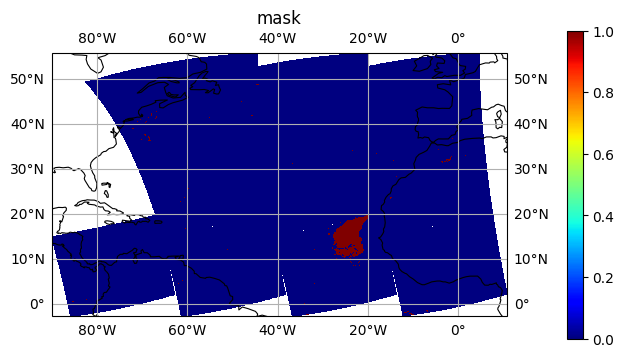

<Figure size 640x480 with 0 Axes>

In [20]:
plot_range = [np.nanmin(lons), np.nanmax(lons), np.nanmin(lats), np.nanmax(lats)]
plot_l2_product(lons, lats, daily_plume_mask[0], plot_range=plot_range, label='', title='mask', vmin=0, vmax=1, cmap="jet")


In [22]:
plume_lats = np.where(daily_plume_mask[0] == 1, lats, np.nan)
plume_lons = np.where(daily_plume_mask[0] == 1, lons, np.nan)
plume_lats_noNAN = plume_lats[~np.isnan(plume_lats)]
plume_lons_noNAN = plume_lons[~np.isnan(plume_lons)]

print(plume_lons_noNAN)
print(len(plume_lats_noNAN))

[ -8.481953  -8.267549  -8.061498 ... -77.381226 -75.29322  -76.172035]
5874


In [23]:
dataset["picoeuk_moana"]

<xarray.DataArray 'picoeuk_moana' (lat: 1400, lon: 1100)> Size: 6MB
[1540000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 6kB 69.95 69.85 69.75 69.65 ... -69.75 -69.85 -69.95
  * lon      (lon) float32 4kB -84.95 -84.85 -84.75 -84.65 ... 24.75 24.85 24.95
Attributes:
    long_name:      cell abundances of picoeukaryotes
    units:          cells ml^-1
    valid_min:      0.0
    valid_max:      40000.0
    reference:      Lange et al. (2020). Radiometric approach for the detecti...
    display_scale:  log
    display_min:    0.0
    display_max:    30000.0

In [70]:
for lati in plume_lats_noNAN:
    print(lati)
    print(dataset['lat'].values)
    temp = dataset["picoeuk_moana"].where(np.isclose(dataset['lat'].values,lati) == True).data
    pm_AOD_lats = temp[~np.isnan(temp)]
    print(pm_AOD_lats)

# temp = np.where(dataset['lat'] == plume_lats_noNAN, dataset["picoeuk_moana"], np.nan)
# temp

-2.1203215
[ 69.95      69.85      69.75     ... -69.75     -69.85     -69.950005]


ValueError: operands could not be broadcast together with shapes (1400,) (1400,1100) () 